New Topics:

 * Exploratory Data Analysis
  

Coding Task:

This week, you will build off of your work from last week.
1. First, (if you haven't done so already), create a new column indicating the SHADAC classification for each Tennessee county. You can use the following code to accomplish this:
```
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
          (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'
```

In [2]:
import pandas as pd
physicians = pd.read_csv('../data/primary_care_physicians.csv')
population = pd.read_csv('../data/population_by_county.csv')

physicians = pd.merge(left=physicians,right=population[['FIPS','population','urban']],on='FIPS')
physicians['residents_per_pcp']=physicians['population']/physicians['primary_care_physicians']

physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
          (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'


physicians = physicians[physicians['state']=='Tennessee']

physicians.head()

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category
2394,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate
2395,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate
2396,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate
2397,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate
2398,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate


2. Use this new column to investigate if there is any relationship between a county's status as urban or rural and its SHADAC classification. Create a plot showing what you find.

In [3]:
pd.crosstab(physicians['urban'],physicians['shadac_category'])

shadac_category,adequate,low inadequate,moderately inadequate
urban,,,
Rural,5,21,31
Urban,9,10,19


In [4]:
physicians.groupby(['urban','shadac_category']).size()

urban  shadac_category      
Rural  adequate                  5
       low inadequate           21
       moderately inadequate    31
Urban  adequate                  9
       low inadequate           10
       moderately inadequate    19
dtype: int64

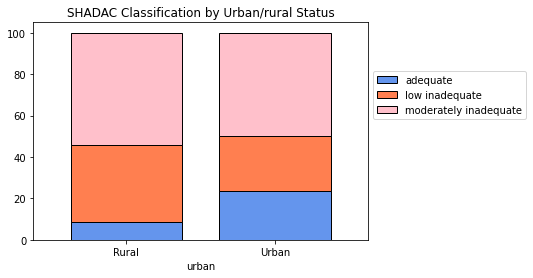

In [5]:
import matplotlib.pyplot as plt
(pd.crosstab(physicians['urban'], physicians['shadac_category'],  normalize = 'index') * 100).plot(kind = 'bar', 
                                                                                        stacked = True,
                                                                                        color = ['cornflowerblue', 'coral', 'pink'],
                                                                                        edgecolor = 'black',
                                                                                        width = 0.75,
                                                                                       )
plt.title('SHADAC Classification by Urban/rural Status')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left'); 

3. Merge the unemployment data (contained in tn_unemployment.csv) into the physicians DataFrame.

In [6]:
unemployment = pd.read_csv('../data/tn_unemployment.csv')
unemployment.head()

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,"Benton County, TN",Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,"Bledsoe County, TN",Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,"Blount County, TN",Mar-21,64098,61119,2979,4.6


In [7]:
unemployment['Name']=unemployment['Name'].str.split(' County',n=1,expand=True)[0]

In [8]:
unemployment.head()

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,Anderson,Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,Bedford,Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,Benton,Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,Bledsoe,Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,Blount,Mar-21,64098,61119,2979,4.6


In [9]:
physicians = pd.merge(left=physicians,
                      right=unemployment[['Name','LF','Employed','Unemployed','unemployment_rate']].rename(columns = {'Name': 'county'}))

In [10]:
physicians.head()

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,Employed,Unemployed,unemployment_rate
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,34704,33010,1694,4.9
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,20623,19550,1073,5.2
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate,6723,6305,418,6.2
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,4252,3947,305,7.2
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,64098,61119,2979,4.6


4. How do unemployment rates compare for urban counties versus rural counties?

In [12]:
physicians.groupby('urban')['unemployment_rate'].describe()
# Rural counties have higher unemployment rate.

,count,mean,std,min,25%,50%,75%,max
urban,,,,,,,,
Rural,57.0,5.850877,0.976349,3.7,5.200,5.60,6.500,9.3
Urban,38.0,4.918421,0.759749,3.3,4.325,4.85,5.375,7.1


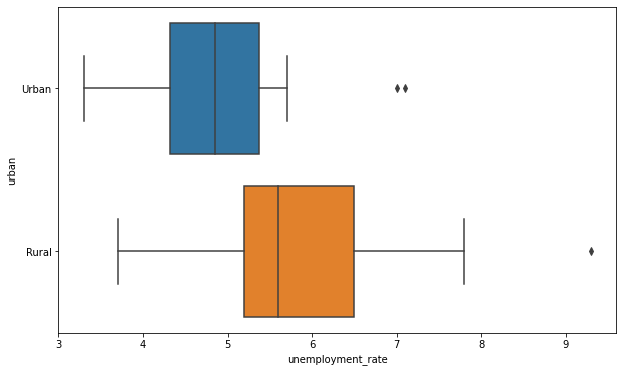

In [16]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.boxplot(data = physicians,
           x = 'unemployment_rate',
           y = 'urban');

5. Create a new column, `pcp_per_100k` which contains the number of primary care physicians per 100,000 residents. Investigate the relationship between this new measure and the unemployment rate per county. What do you find?

In [17]:
physicians['pcp_per_100k'] = physicians['primary_care_physicians'] / physicians['population'] * 100000

In [18]:
physicians.head()

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,34704,33010,1694,4.9,51.274635
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,20623,19550,1073,5.2,31.061045
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate,6723,6305,418,6.2,18.587361
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,4252,3947,305,7.2,6.740361
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,64098,61119,2979,4.6,69.269667


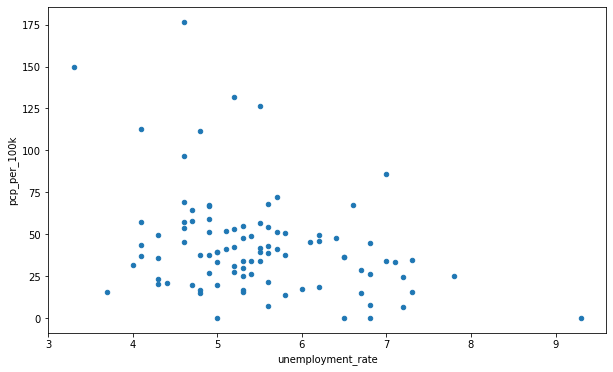

In [19]:
physicians.plot(kind = 'scatter',
             x = 'unemployment_rate',
             y = 'pcp_per_100k',
             figsize = (10,6));

In [20]:
# negative correlation
physicians[['pcp_per_100k', 'unemployment_rate']].corr()

,pcp_per_100k,unemployment_rate
pcp_per_100k,1.000000,-0.335333
unemployment_rate,-0.335333,1.000000
